(1) In this lab we will review some basics of python scientific toolkits

Consider the function 
f(x) = $\exp(-(x-2)^2)+\exp(-\frac{(x-6)^2}{10})+\frac{1}{x^2+1}$


Plot the function in the range $[-10,10]$ using matplotlib 





x= [-10.          -8.94736842  -7.89473684  -6.84210526  -5.78947368
  -4.73684211  -3.68421053  -2.63157895  -1.57894737  -0.52631579
   0.52631579   1.57894737   2.63157895   3.68421053   4.73684211
   5.78947368   6.84210526   7.89473684   8.94736842  10.        ]
y= [0.00990099 0.01233724 0.01579109 0.02091427 0.02897131 0.0426762
 0.06870266 0.12676086 0.28948526 0.79890401 0.94703932 1.26544679
 1.1187852  0.71216021 0.89574638 1.02454864 0.95245608 0.7141635
 0.43183459 0.21179751]


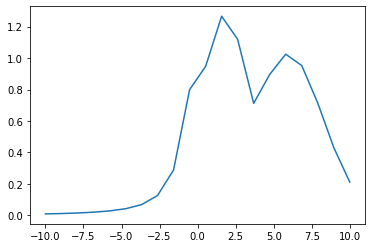

In [24]:
import numpy as np
import math
import matplotlib.pyplot as plt
x = np.linspace(-10, 10, 20)
print('x=',x)
y=np.exp(-1*np.power(x-2,2))+np.exp(-1*np.power(x-6,2)/10)+(1/(np.power(x,2)+1))
print('y=',y)
plt.plot(x, y) 

(2) Sample the function uniformly with 500 samples on [-10,10]

First lets approximate this with linear model $f(x)=wx+b$. Use sklearn and LinearRegression() to fit the function. Plot the approximation and compute the mean squared error. Repeat using the sklearn.neural_network.MLPRegressor and a 1 hidden layer network with 20 units, you may set all other settings to sklearn default for this classifier. 

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html



In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
x = np.linspace(-10, 10, 50)
# print('x=',x)
y=np.exp(-1*np.power(x-2,2))+np.exp(-1*np.power(x-6,2)/10)+(1/(np.power(x,2)+1))
# y=(x+x)/2
print('y=',y)
x=x.reshape(-1, 1)
# print('x=',x)
y=y.reshape(-1, 1)
# print('y=',y)
reg = LinearRegression().fit(x, y)
print('LR score=',reg.score(x, y))
reg.coef_
print('LR pred_y=',reg.predict(x))


X_train, X_test, y_train, y_test = train_test_split(x, y,random_state=1)
regr = MLPRegressor(hidden_layer_sizes=(20),random_state=1, max_iter=600).fit(X_train, y_train)
print('MLP score=',regr.score(X_test, y_test))
print('MLP pred_y=',regr.predict(X_test))
print('y_test=',y_test)


y= [0.00990099 0.0107523  0.01171785 0.01281894 0.01408203 0.01554036
 0.01723607 0.01922326 0.02157222 0.02437564 0.02775758 0.03188713
 0.03699924 0.04342774 0.05165873 0.06241993 0.07683437 0.09669359
 0.12495772 0.16669099 0.23079712 0.3328793  0.49724569 0.74106661
 0.98908187 1.03451967 0.92797498 0.95671995 1.17399373 1.37904571
 1.35148682 1.10340934 0.84231029 0.71921737 0.72913082 0.80238416
 0.88728467 0.95959315 1.00818529 1.02709095 1.01376981 0.96902555
 0.89678121 0.80341847 0.69678072 0.58504373 0.47567198 0.3746361
 0.28598755 0.21179751]
LR score= 0.4441628554354088
LR pred_y= [[-0.0011792 ]
 [ 0.01918149]
 [ 0.03954217]
 [ 0.05990285]
 [ 0.08026354]
 [ 0.10062422]
 [ 0.1209849 ]
 [ 0.14134558]
 [ 0.16170627]
 [ 0.18206695]
 [ 0.20242763]
 [ 0.22278832]
 [ 0.243149  ]
 [ 0.26350968]
 [ 0.28387037]
 [ 0.30423105]
 [ 0.32459173]
 [ 0.34495241]
 [ 0.3653131 ]
 [ 0.38567378]
 [ 0.40603446]
 [ 0.42639515]
 [ 0.44675583]
 [ 0.46711651]
 [ 0.4874772 ]
 [ 0.50783788]
 [ 0.528

c:\program files\python37\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


MLP score= 0.4118661371569695
MLP pred_y= [ 0.66120093  0.71779455  0.72466711  0.72191809 -0.10721913 -0.08217359
  0.73566321  0.64963709  0.73291419  0.69229677  0.702827    0.7232926
  0.30073993]
y_test= [[0.95671995]
 [0.80238416]
 [1.01376981]
 [1.00818529]
 [0.01171785]
 [0.01281894]
 [0.28598755]
 [1.37904571]
 [0.47567198]
 [1.10340934]
 [0.84231029]
 [1.02709095]
 [0.3328793 ]]



(3) Use *sklearn.datasets* library to generate classification datasets using the *sklearn.datasets.make_classification*.

(a) Create binary classification datasets with  2, 10, 50 and 100 dimensions, with 50 and 500 samples for training and 5000 for testing. Create linear and non-linearly separable datasets. In total there should be 4 x 2 x 2 =16 datasets. 

Alternatively to using *make classification* you may select a method of your choosing to construct the synthetic datasets.


https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets


(b) In the dataset with 50 samples and  linearly separable for each case measure the average distance between points and visualize this in a plot with dimension (2,10,50,100) on the x-axis and average distance between points on the y-axis.


(c) Visualize each of the datasets you created in 2 dimensions. For higher-dimensional (10,50,100) data use both PCA and t-sne from the *sklearn* package to create these visualizations in 2 dimensions. 

(d) Fit a linear model of your choice from the sklearn library to each of these cases and report accuracy and AUC 